In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame

In [ ]:
X = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.shape

(569, 30)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
sc = StandardScaler()
svm = SVC(probability=True)
pipe = Pipeline([("sc",sc),("svm",svm)])
parameters = [
    {
        "svm__C": [0.1, 1, 10, 100],
        "svm__kernel":["linear"]
    },
    {
        "svm__C": [0.1, 1, 10, 100],
        "svm__kernel":["rbf"],
        "svm__gamma":['scale','auto']
    },
    {
        "svm__C": [0.1, 1, 10, 100],
        "svm__kernel":["poly"],
        "svm__degree":[2,3,4]}
]


In [ ]:
grid = GridSearchCV(estimator=pipe,param_grid=parameters,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             param_grid=[{'svm__C': [0.1, 1, 10, 100],
                          'svm__kernel': ['linear']},
                         {'svm__C': [0.1, 1, 10, 100],
                          'svm__gamma': ['scale', 'auto'],
                          'svm__kernel': ['rbf']},
                         {'svm__C': [0.1, 1, 10, 100], 'svm__degree': [2, 3, 4],
                          'svm__kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
grid.best_params_

{'svm__C': 0.1, 'svm__kernel': 'linear'}

In [ ]:
svm_final = SVC(probability=True,C=0.1,kernel="linear")
final_pipe = Pipeline([("sc",sc),("svm_final",svm_final)])
final_pipe.fit(x_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('svm_final', SVC(C=0.1, kernel='linear', probability=True))])

In [ ]:
y_pred = final_pipe.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
y_prob = final_pipe.predict_proba(x_test)
y_prob

array([[1.25284031e-01, 8.74715969e-01],
       [9.99949037e-01, 5.09628847e-05],
       [9.93881334e-01, 6.11866578e-03],
       [1.16449638e-05, 9.99988355e-01],
       [6.91944820e-08, 9.99999931e-01],
       [9.99999900e-01, 1.00000010e-07],
       [9.99999900e-01, 1.00000010e-07],
       [9.42894808e-01, 5.71051925e-02],
       [3.77528559e-01, 6.22471441e-01],
       [1.50409925e-05, 9.99984959e-01],
       [7.54697442e-02, 9.24530256e-01],
       [9.72287937e-01, 2.77120626e-02],
       [1.28554973e-02, 9.87144503e-01],
       [8.94976282e-01, 1.05023718e-01],
       [1.72572876e-05, 9.99982743e-01],
       [9.99186095e-01, 8.13904524e-04],
       [3.93069005e-03, 9.96069310e-01],
       [2.62370151e-09, 9.99999997e-01],
       [2.09561537e-11, 1.00000000e+00],
       [9.99995764e-01, 4.23552324e-06],
       [1.19612051e-01, 8.80387949e-01],
       [1.22553225e-02, 9.87744678e-01],
       [9.99999900e-01, 1.00000010e-07],
       [1.06557422e-07, 9.99999893e-01],
       [2.557901

In [ ]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[41,  2],
       [ 0, 71]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


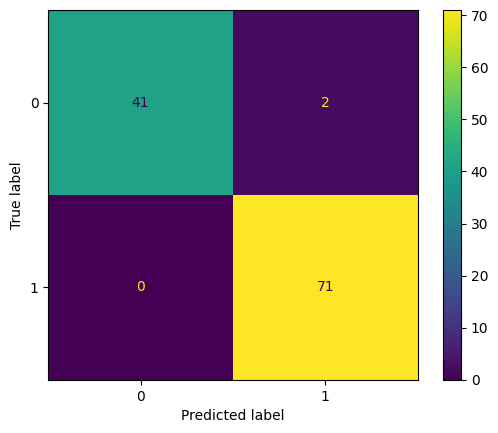

In [ ]:
ConfusionMatrixDisplay(conf).plot()

In [ ]:
print(f"classification report: \n{classification_report(y_test,y_pred)}")

classification report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
auc_score = roc_auc_score(y_test, y_prob[:,1])


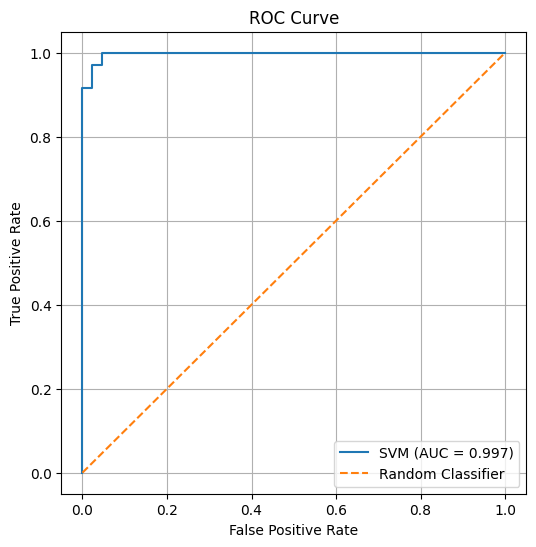

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from joblib import dump
dump(final_pipe,'/content/drive/MyDrive/AIML_PRACTICE/SVM_assignments/pipeline_model.joblib')

['/content/drive/MyDrive/AIML_PRACTICE/SVM_assignments/pipeline_model.joblib']

In [ ]:
import joblib
model = joblib.load('/content/drive/MyDrive/AIML_PRACTICE/SVM_assignments/pipeline_model.joblib')
model

Pipeline(steps=[('sc', StandardScaler()),
                ('svm_final', SVC(C=0.1, kernel='linear', probability=True))])

In [ ]:
model.predict([[17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
def predict_breast_cancer(features, name_model):



    features = np.array(features).reshape(1, -1)

    pred_class = model.predict(features)[0]

    # Probability estimates (requires probability=True in SVM)
    probs = model.predict_proba(features)[0]

    label_map = {
        0: "Malignant",
        1: "Benign"
    }

    return {
        "Predicted Class": int(pred_class),
        "Diagnosis": label_map[pred_class],
        "Probability Malignant": round(probs[0], 4),
        "Probability Benign": round(probs[1], 4)
    }


In [ ]:
feat = [17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]

In [ ]:
predict_breast_cancer(feat,model)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'Predicted Class': 0,
 'Diagnosis': 'Malignant',
 'Probability Malignant': np.float64(1.0),
 'Probability Benign': np.float64(0.0)}